In [4]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras 
from tensorflow.keras import layers
import tf_keras


In [5]:
IMAGE_SHAPE = (224, 224)

classifier = tf_keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

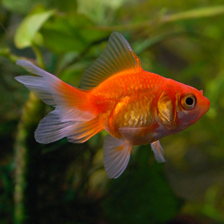

In [6]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [7]:
gold_fish = np.array(gold_fish) / 255.0
gold_fish.shape

(224, 224, 3)

In [8]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [9]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 207ms/step


(1, 1001)

In [10]:
result

array([[ 0.22101459,  2.0474896 ,  9.622562  , ..., -1.4621571 ,
        -0.28146517, -0.2598483 ]], dtype=float32)

In [11]:
predicted_label_index = np.argmax(result)
predicted_label_index

np.int64(2)

In [12]:
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()

image_labels[:10]

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen']

In [13]:
image_labels[predicted_label_index]

'goldfish'

In [14]:
# Download data 
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [15]:
data_dir

'./datasets/flower_photos'

In [16]:
import pathlib 
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [19]:
image_count = len(list(data_dir.glob('*/*/*.jpg')))
image_count

3670

In [21]:
roses = list(data_dir.glob('*/roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

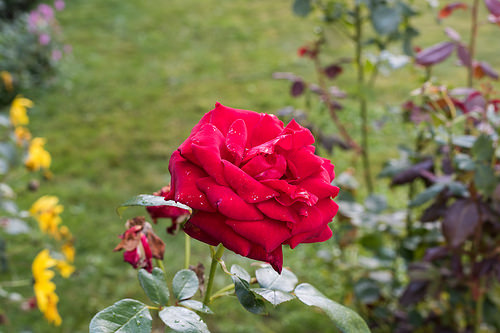

In [23]:
Image.open(roses[3])

In [24]:
# Create a dict for all flowers
flowers_image_dict = {
    'roses': list(data_dir.glob('*/roses/*')), 
    'daisy': list(data_dir.glob('*/daisy/*')), 
    'dandelion': list(data_dir.glob('*/dandelion/*')), 
    'sunflowers': list(data_dir.glob('*/sunflowers/*')), 
    'tulips': list(data_dir.glob('*/tulips/*')), 
}

In [25]:
flowers_labels_dict = {
    'roses': 0, 
    'daisy': 1,
    'dandelion': 2, 
    'sunflowers': 3, 
    'tulips': 4,
}

In [27]:
flowers_image_dict['tulips'][:5]

[PosixPath('datasets/flower_photos/flower_photos/tulips/5700466891_2bcb17fa68_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/14087792403_f34f37ba3b_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/3446285408_4be9c0fded_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/16282277874_b92776b194.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/8748266132_5298a91dcf_n.jpg')]

In [28]:
str(flowers_image_dict['roses'][0])

'datasets/flower_photos/flower_photos/roses/16209331331_343c899d38.jpg'

In [30]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
img.shape

(243, 500, 3)

In [31]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [32]:
X, y = [], []

for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [34]:
X[0]

array([[[  6,   1,   1],
        [  0,   1,   1],
        [ 51,  36,  30],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       [[  3,   8,  23],
        [  3,   2,   1],
        [ 14,   7,  18],
        ...,
        [243, 244, 242],
        [243, 244, 242],
        [243, 244, 242]],

       [[ 42,  88, 165],
        [  7,   1,   3],
        [ 12,  12,  24],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       ...,

       [[144, 109,  87],
        [149, 114,  91],
        [147, 113,  89],
        ...,
        [152, 122,  95],
        [154, 124,  97],
        [150, 120,  92]],

       [[150, 115,  93],
        [151, 117,  94],
        [151, 117,  93],
        ...,
        [150, 121,  93],
        [153, 123,  96],
        [151, 121,  93]],

       [[153, 119,  96],
        [148, 114,  90],
        [150, 116,  92],
        ...,
        [151, 121,  94],
        [149, 119,  94],
        [152, 122,  94]]

In [36]:
X = np.array(X)
y = np.array(y)

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [68]:
X_train.shape, y_train.shape

((2752, 224, 224, 3), (2752,))

In [69]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

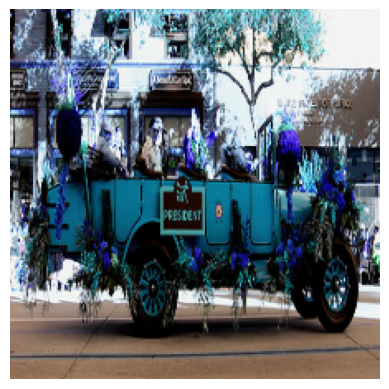

In [70]:
plt.axis('off')
plt.imshow(X[0])

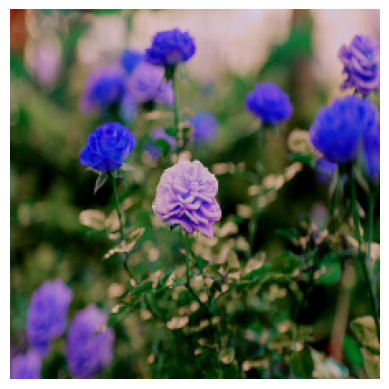

In [71]:
plt.axis('off')
plt.imshow(X[1])

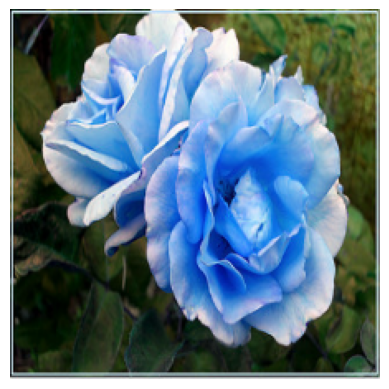

In [72]:
plt.axis('off')
plt.imshow(X[2])

In [73]:
predicted = classifier.predict(np.array([X[0], X[1], X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 0s 74ms/step


array([795, 795, 722])

In [74]:
image_labels[795]

'shower curtain'

**WHY?** Because the pretrained model does not include your training data information.

In [84]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenet_v2_layer = hub.KerasLayer(
    feature_extractor_model, trainable=False, name='mobilenet_v2'
)

In [85]:
num_of_flowers = 5

class MobileNetV2(layers.Layer):
    def call(self, inputs):
        return mobilenet_v2_layer(inputs)

model = tf.keras.Sequential([
    # Input
    layers.Input(shape=IMAGE_SHAPE+(3,)),

    # MobileNetV2
    MobileNetV2(),

    # Custom layers
    tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobile_net_v2_5 (MobileNetV2)   │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,405 (25.02 KB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
model.compile(optimizer='adam',
                    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                    metrics=['accuracy'], 
                    jit_compile=False)

In [87]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - accuracy: 0.5534 - loss: 1.1278
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - accuracy: 0.8428 - loss: 0.4427
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.8900 - loss: 0.3336
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - accuracy: 0.9124 - loss: 0.2864
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 125ms/step - accuracy: 0.9313 - loss: 0.2299


In [88]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.8769 - loss: 0.3634


[0.3638627827167511, 0.8736383318901062]